In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.io import wavfile
import os.path
import IPython.display as ipd
import seaborn as sns
import librosa
import librosa.display
import soundfile
import os

In [8]:
# Using Crema
get_dir = Path('/home/adapsay/data/Crema')

In [9]:
%pwd

'/home/adapsay/ds3-audio/notebooks'

In [10]:
filepaths = list(get_dir.glob('*'))
filepaths  

[PosixPath('/home/adapsay/data/Crema/1026_IEO_HAP_HI.wav'),
 PosixPath('/home/adapsay/data/Crema/1080_TSI_HAP_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/1038_IEO_HAP_HI.wav'),
 PosixPath('/home/adapsay/data/Crema/1089_IEO_FEA_LO.wav'),
 PosixPath('/home/adapsay/data/Crema/1089_DFA_DIS_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/1056_TIE_NEU_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/1022_MTI_NEU_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/1038_IWW_DIS_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/1066_ITH_FEA_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/1048_TIE_NEU_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/1070_IEO_SAD_HI.wav'),
 PosixPath('/home/adapsay/data/Crema/1033_TAI_ANG_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/1004_TIE_FEA_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/1070_MTI_FEA_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/1026_IWW_DIS_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/1078_ITH_FEA_XX.wav'),
 PosixPath('/home/adapsay/data/Crema/108

In [11]:
labels = list(map(lambda x: os.path.split(x)[1].split('_')[2], filepaths))
labels

['HAP',
 'HAP',
 'HAP',
 'FEA',
 'DIS',
 'NEU',
 'NEU',
 'DIS',
 'FEA',
 'NEU',
 'SAD',
 'ANG',
 'FEA',
 'FEA',
 'DIS',
 'FEA',
 'NEU',
 'ANG',
 'NEU',
 'HAP',
 'HAP',
 'ANG',
 'HAP',
 'ANG',
 'HAP',
 'DIS',
 'HAP',
 'DIS',
 'SAD',
 'SAD',
 'SAD',
 'SAD',
 'FEA',
 'SAD',
 'SAD',
 'DIS',
 'ANG',
 'ANG',
 'ANG',
 'ANG',
 'HAP',
 'HAP',
 'ANG',
 'DIS',
 'DIS',
 'DIS',
 'FEA',
 'FEA',
 'DIS',
 'HAP',
 'NEU',
 'DIS',
 'NEU',
 'NEU',
 'HAP',
 'ANG',
 'DIS',
 'ANG',
 'FEA',
 'HAP',
 'ANG',
 'FEA',
 'ANG',
 'NEU',
 'ANG',
 'FEA',
 'ANG',
 'HAP',
 'DIS',
 'SAD',
 'SAD',
 'NEU',
 'DIS',
 'SAD',
 'ANG',
 'SAD',
 'ANG',
 'ANG',
 'DIS',
 'FEA',
 'NEU',
 'NEU',
 'DIS',
 'HAP',
 'NEU',
 'DIS',
 'DIS',
 'HAP',
 'DIS',
 'FEA',
 'ANG',
 'NEU',
 'NEU',
 'NEU',
 'NEU',
 'DIS',
 'DIS',
 'FEA',
 'ANG',
 'NEU',
 'DIS',
 'FEA',
 'SAD',
 'HAP',
 'FEA',
 'HAP',
 'NEU',
 'FEA',
 'SAD',
 'SAD',
 'FEA',
 'SAD',
 'SAD',
 'HAP',
 'HAP',
 'HAP',
 'SAD',
 'ANG',
 'SAD',
 'HAP',
 'ANG',
 'ANG',
 'HAP',
 'HAP',
 'ANG',


In [12]:
set(labels)

{'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD'}

In [13]:
len(filepaths) == len(labels)

labels_wav = []
for i in range(len(filepaths)):
    labels_wav.append([labels[i], filepaths[i]])
    

In [14]:
labeled_wav = pd.DataFrame(labels_wav, columns = ['Emotion', '.wav file'])
labeled_wav

,Emotion,.wav file
0,HAP,/home/adapsay/data/Crema/1026_IEO_HAP_HI.wav
1,HAP,/home/adapsay/data/Crema/1080_TSI_HAP_XX.wav
2,HAP,/home/adapsay/data/Crema/1038_IEO_HAP_HI.wav
3,FEA,/home/adapsay/data/Crema/1089_IEO_FEA_LO.wav
4,DIS,/home/adapsay/data/Crema/1089_DFA_DIS_XX.wav
...,...,...
7437,HAP,/home/adapsay/data/Crema/1070_ITH_HAP_XX.wav
7438,ANG,/home/adapsay/data/Crema/1072_IWW_ANG_XX.wav
7439,DIS,/home/adapsay/data/Crema/1079_TAI_DIS_XX.wav
7440,HAP,/home/adapsay/data/Crema/1012_TIE_HAP_XX.wav


In [15]:
tsi_hap_xx = ipd.Audio(labeled_wav['.wav file'].astype(str).iloc[1])
tsi_hap_xx

In [16]:
ieo_fearful_lo = ipd.Audio(labeled_wav['.wav file'].astype(str).iloc[3])
ieo_fearful_lo

In [17]:
iww_angry_xx = ipd.Audio(labeled_wav['.wav file'].astype(str).iloc[7438])
iww_angry_xx

In [18]:
hap, sr = librosa.load(labeled_wav['.wav file'].astype(str).iloc[1])
hap.shape

(52237,)

In [19]:
hap_ft = np.fft.fft(hap)

In [20]:
hap_ft.shape

(52237,)

In [21]:
hap_ft[0]

(-0.49879011702822085+2.1094237467877974e-15j)

In [33]:
sr

22050

In [49]:
def magnitude_spectrum_graph(signal, plot_title, sample_rate):
    ft = np.fft.fft(signal)
    magnitude_spectrum = np.abs(ft) # shows frequency value existing in the signal
    
    # graphing magnitude spectrum
    frequency = np.linspace(0, sample_rate, len(magnitude_spectrum))
    plt.plot(frequency, magnitude_spectrum)
    plt.xlabel("Frequency (HZ)")
    plt.title(plot_title)
    
    plt.show()

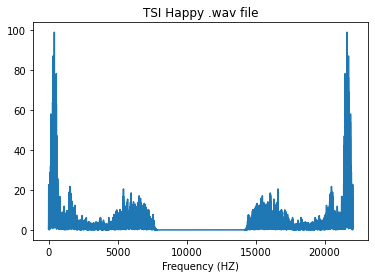

In [50]:
magnitude_spectrum_graph(hap, "TSI Happy .wav file", sr)

In [54]:
def magnitude_spectrum_graph_half(signal, plot_title, sample_rate):
    ft = np.fft.fft(signal)
    magnitude_spectrum = np.abs(ft) # shows frequency value existing in the signal
    
    # graphing magnitude spectrum
    frequency = np.linspace(0, sample_rate // 2, len(magnitude_spectrum) // 2)
    plt.plot(frequency, magnitude_spectrum[:len(frequency)])
    plt.xlabel("Frequency (HZ)")
    plt.ylabel("Magnitude/Strength of Frequency")
    plt.title(plot_title)
    
    plt.show()

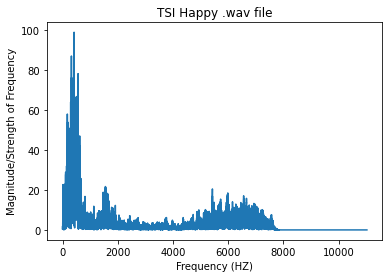

In [55]:
magnitude_spectrum_graph_half(hap, "TSI Happy .wav file", sr)